Index(['client_id', ' age', ' income', ' years_employed', ' credit_score',
       ' debt_to_income       ', ' num_credit_cards', ' num_late_payments',
       ' has_mortgage', ' has_car_loan', ' savings_balance',
       ' checking_balance', ' region_risk_score    ',
       ' phone_calls_to_support_last_3m', ' active_loans',
       ' customer_tenure_years', ' default'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   client_id                        3000 non-null   int64  
 1    age                             3000 non-null   int64  
 2    income                          3000 non-null   int64  
 3    years_employed                  3000 non-null   int64  
 4    credit_score                    3000 non-null   int64  
 5    debt_to_income                  3000 non-null   float64
 6  

FileNotFoundError: [Errno 2] No such file or directory: 'homeworks/HW05/figures/roc_curve_logreg.png'

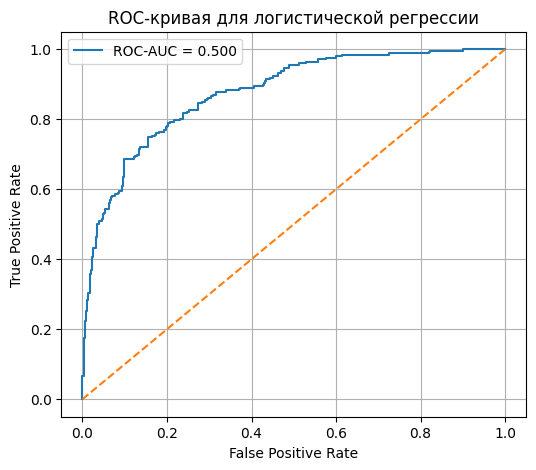

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve



import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
import pandas as pd

df = pd.read_csv("S05-hw-dataset.csv") #Загрузка датасета
print(df.columns)
df.head() #Просмотр первых строк
df.info() #Информация о структуре данных
df.describe() #Описательные статистики числовых признаков
df[" default"].value_counts() #Распределение целевого признака default
df[" default"].value_counts(normalize=True)

X = df.drop(columns=[" default", "client_id"])
y = df[" default"]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
) #Разделение данных на обучающую и тестовую выборки


dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train) #Построение бейзлайн модели

#Оценка качества бейзлайн модели
y_pred = dummy_clf.predict(X_test)
y_proba = dummy_clf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Baseline accuracy: {accuracy:.3f}")
print(f"Baseline ROC-AUC: {roc_auc:.3f}")

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

C_values = [0.01, 0.1, 1.0, 10.0]

best_auc = 0
best_model = None
best_C = None

for C in C_values:
    pipe.set_params(logreg__C=C)
    pipe.fit(X_train, y_train)

    y_proba = pipe.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)

    if auc > best_auc:
        best_auc = auc
        best_model = pipe
        best_C = C

print(f"Лучшее значение C: {best_C}")
print(f"Лучший ROC-AUC: {best_auc:.3f}")
#Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix
#Построение ROC кривой
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая для логистической регрессии")
plt.legend()
plt.grid(True)


In [ ]:
# В качестве бейзлайн-модели использовался DummyClassifier, который не учитывает значения признаков и формирует предсказания по простому правилу, что привело к низкому качеству классификации и ROC-AUC, близкому к 0.5.
# Логистическая регрессия, напротив, использует информацию о признаках и после стандартизации показала заметно лучшие результаты по обеим метрикам.
# По сравнению с бейзлайном значение accuracy увеличилось, а ROC-AUC вырос существенно, что говорит о способности модели различать классы.

# Подбор коэффициента регуляризации C показал, что при слишком малых значениях C качество модели ухудшается из-за чрезмерной регуляризации, тогда как при умеренных значениях достигается наилучший баланс между обобщением и точностью.
# Слишком большие значения C не дали значимого улучшения качества и потенциально могут приводить к переобучению.

# В целом логистическая регрессия выглядит разумной базовой моделью для данной задачи, так как она проста, интерпретируема и демонстрирует устойчивое качество.
# Использование пайплайна со стандартизацией позволяет корректно обрабатывать признаки и делает модель воспроизводимой.
# Для дальнейшего улучшения качества целесообразно рассмотреть более сложные модели или дополнительную работу с признаками.

NameError: name 'pipe' is not defined